---

### Milestone 2

- Nama              : Muhammad Afza Nur Hakim
- Objective         : Project ini dibuat untuk mengembangkan model prediksi harga tiket pesawat berdasarkan fitur-fitur yang relevan sehingga maskapai atau platform online travel agent dapat menetapkan harga yang kompetitif dan optimal 
---

# Problem Statement and Dataset Description

### Latar Belakang

Penentuan harga tiket pesawat yang optimal dan kompetitif adalah tantangan krusial dalam industri penerbangan dan pariwisata. Harga tiket bersifat sangat dinamis dan dipengaruhi oleh banyak faktor seperti maskapai, rute, kelas layanan, waktu booking, dsb. Harga yang tidak akurat dapat menyebabkan kerugian finansial bagi maskapai (jika harga terlalu rendah) atau membuat konsumen beralih ke maskapai lain (jika harga terlalu tinggi)

Bagi Online Travel Agent (OTA) seperti Traveloka, Tiket.com, atau Skyscanner, memprediksi harga tiket secara akurat sangat penting untuk memberikan rekomendasi terbaik, memaksimalkan konversi, dan menjaga kepuasan pelanggan

### Problem Statement

Project ini bertujuan mengoptimalkan strategi penetapan harga bagi maskapai penerbangan dengan cara membangun model prediksi berbasis machine learning. Model ini akan secara spesifik memperkirakan harga tiket berdasarkan faktor-faktor krusial hal ini dapat dicapai melalui pemanfaatan data historis penerbangan yang sudah tersedia. Target terukur dari proyek ini adalah meningkatkan akurasi prediksi harga, yang diharapkan dapat mendorong peningkatan pendapatan maskapai hingga 10% dari penjualan tiket. Project ini sangat relevan dan vital untuk mempertahankan profitabilitas di tengah persaingan industri yang ketat, seluruh pengembangan serta integrasi model ini ditargetkan selesai dalam jangka waktu 6 bulan

### Penjabaran Masalah

Terdapat 7 penjabaran kunci yang akan dijawab dengan visualisasi data sebagai berikut:
- Bagaimana distribusi data harga tiket keseluruhan?
- Apakah maskapai penerbangan merupakan penentu harga yang signifikan?
- Bagaimana pengaruh waktu keberangkatan terhadap harga tiket?
- Bagaimana pengaruh durasi penerbangan terhadap harga tiket?
- Apakah jumlah pemberhentian memiliki pengaruh terhadap harga tiket?
- Bagaimana hubungan antara `days_left` dengan `price`?
- Apakah terdapat perbedaan signifikan pada rata-rata harga tiket pesawat untuk rentang `days_left` tertentu?

### Sumber Dataset

- Nama Dataset : Flight Price Prediction (Dataset.csv)
- Asal Dataset : Diambil dari Kaggle (https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)
- Tentang Dataset : Dataset ini berisi dataset penerbangan di India dari bulan Februari - Maret 2022. Data didapat dari website Ease My Trip. Data memiliki informasi tentang maskapai penerbangan, kode penerbangan, kota asal, waktu keberangkatan, total perhentian, waktu kedatangan, kota tujuan, kelas penerbangan, durasi penerbangan, jarak antara booking dengan penerbangan, dan price sebagai targetnya. Terdapat total 2.890 baris

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, f_oneway
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# Data Loading

### Load the file of dataset

In [2]:
df = pd.read_csv('Dataset.csv') # read file dataset
    
df 

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,27131,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40,7366
1,266857,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42,64831
2,141228,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Economy,10.50,41,6195
3,288329,Vistara,UK-824,Chennai,Night,one,Morning,Delhi,Business,14.50,14,60160
4,97334,Air_India,AI-501,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,20,6578
...,...,...,...,...,...,...,...,...,...,...,...,...
2885,60377,Vistara,UK-994,Mumbai,Morning,one,Night,Bangalore,Economy,10.00,43,6450
2886,204655,AirAsia,I5-1727,Chennai,Afternoon,one,Evening,Hyderabad,Economy,3.50,26,1550
2887,265512,Vistara,UK-708,Kolkata,Night,one,Afternoon,Mumbai,Business,16.17,23,72671
2888,137437,AirAsia,I5-541,Kolkata,Early_Morning,one,Morning,Bangalore,Economy,5.83,16,5315


### Eksplorasi Data Sederhana

In [3]:
print("\n--- Info Dataset ---")
df.info()

print("\n--- Statistik Deskriptif Dasar untuk Kolom Numerik ---")
df.describe()
print(df.describe())

print("\n--- Cek Data Duplikat ---")
print(df.duplicated().sum())

print("\n--- Cek Missing Value ---")
print(df.isnull().sum())

print("\n--- Presentase Missing Value ---")
print()    
missing_percentage = (df.isnull().sum() / len(df)) * 100 # menghitung presentase yang missing dari keseluruhan 2.890 data
print(missing_percentage)


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2890 non-null   int64  
 1   airline           2890 non-null   object 
 2   flight            2890 non-null   object 
 3   source_city       2890 non-null   object 
 4   departure_time    2890 non-null   object 
 5   stops             2890 non-null   object 
 6   arrival_time      2890 non-null   object 
 7   destination_city  2890 non-null   object 
 8   class             2890 non-null   object 
 9   duration          2890 non-null   float64
 10  days_left         2890 non-null   int64  
 11  price             2890 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 271.1+ KB

--- Statistik Deskriptif Dasar untuk Kolom Numerik ---
          Unnamed: 0     duration    days_left          price
count    2890.000000  2890.0000

- Dataset terdiri dari 12 kolom dan 2.890 baris
- Tidak terdapat missing value
- Tidak terdapat data duplicate
- Terdapat kolom Unnamed:0, ini hanya unique identifier dan tidak akan berpengaruh pada prediksi model sehingga akan dihapus
- Tipe data setiap kolom sudah tepat
- Terdapat 3 tabel numerik yaitu `duration`, `days_left`, dan `price`. Sementara 8 tabel lainnya merupakan tabel kategorikal

# Exploratory Data Analysis

In [4]:
df_eda = df.copy()

Buat df_eda untuk melakukan EDA

### Distribusi Data Harga Tiket Keseluruhan

Untuk menjawab pertanyaan: Bagaimana distribusi data harga tiket keseluruhan?

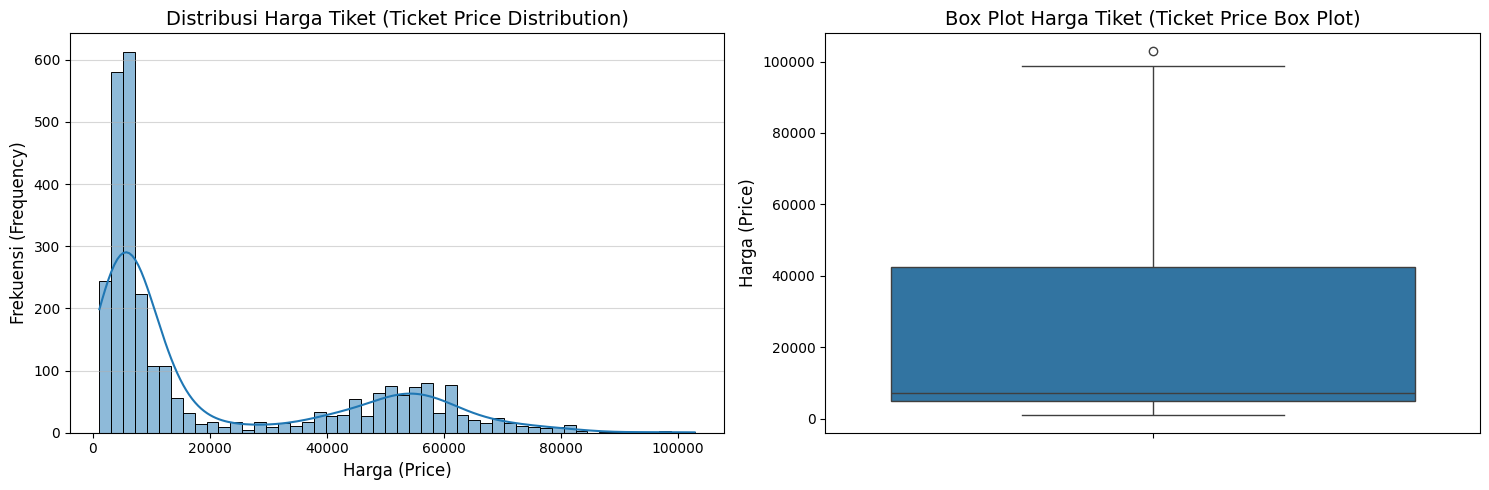


Statistik Deskriptif untuk Harga (Price):
count      2890.000000
mean      20855.822145
std       22844.916807
min        1105.000000
25%        4818.750000
50%        7270.500000
75%       42521.000000
max      102832.000000
Name: price, dtype: float64


In [5]:
# Set ukuran figure untuk menampilkan dua plot secara berdampingan
plt.figure(figsize=(15, 5))

# Plot 1: Histogram (Distribusi Frekuensi)
plt.subplot(1, 2, 1)
# Menggunakan histplot untuk menampilkan distribusi harga tiket dengan KDE (Density Curve)
sns.histplot(df_eda['price'], kde=True, bins=50)
plt.title('Distribusi Harga Tiket (Ticket Price Distribution)', fontsize=14)
plt.xlabel('Harga (Price)', fontsize=12)
plt.ylabel('Frekuensi (Frequency)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Plot 2: Box Plot (Deteksi Outlier dan Quartil)
plt.subplot(1, 2, 2)
# Menggunakan boxplot untuk melihat sebaran kuartil dan outliers
sns.boxplot(y=df_eda['price'])
plt.title('Box Plot Harga Tiket (Ticket Price Box Plot)', fontsize=14)
plt.ylabel('Harga (Price)', fontsize=12)

# Mengatur layout agar plot tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

print("\nStatistik Deskriptif untuk Harga (Price):")
print(df_eda['price'].describe())

Distribusi data menunjukkan distribusi positive skewed. Ini berarti sebagian besar harga tiket terkonsentrasi pada nilai yang lebih rendah, sementara terdapat sebagian kecil tiket dengan harga yang sangat tinggi yang membuat nilai rata-rata menjadi lebih tinggi

Standar deviasi yang besar menunjukan bahwa harga tiket memiliki variabilitas yang tinggi, hal ini masuk akal karena terdapat kelas Ekonomi dan Bisnis yang memiliki gap harga yang cukup besar

Mayoritas transaksi berada pada kisaran harga rendah (1.105) hingga menengah (7.271), sedangkan harga tinggi (> 42.521) adalah minoritas, yang kemungkinan merepresentasikan tiket kelas bisnis

### Signifikansi Maskapai Penerbangan Sebagai Penentu Harga

Untuk menjawab pertanyaan: Apakah maskapai penerbangan merupakan penentu harga yang signifikan?

--- Harga Rata-rata dan Sebaran per Maskapai ---
           count          mean   median   min     max
airline                                              
Vistara     1236  30370.862460  15456.0  1714  102832
Air_India    766  23641.921671  10987.0  1526   80816
SpiceJet      85   5838.435294   5715.0  1444   13474
GO_FIRST     239   5624.502092   5507.0  1105   17136
Indigo       394   5284.043147   4500.0  1105   30786
AirAsia      170   4134.070588   3379.0  1544   21141


--- Uji One-Way ANOVA untuk Harga Maskapai ---
F-Statistic: 165.11
P-Value: 0.0000000000

Kesimpulan: P-Value sangat kecil (< 0.05), yang menunjukkan ada perbedaan yang signifikan secara statistik antar maskapai.




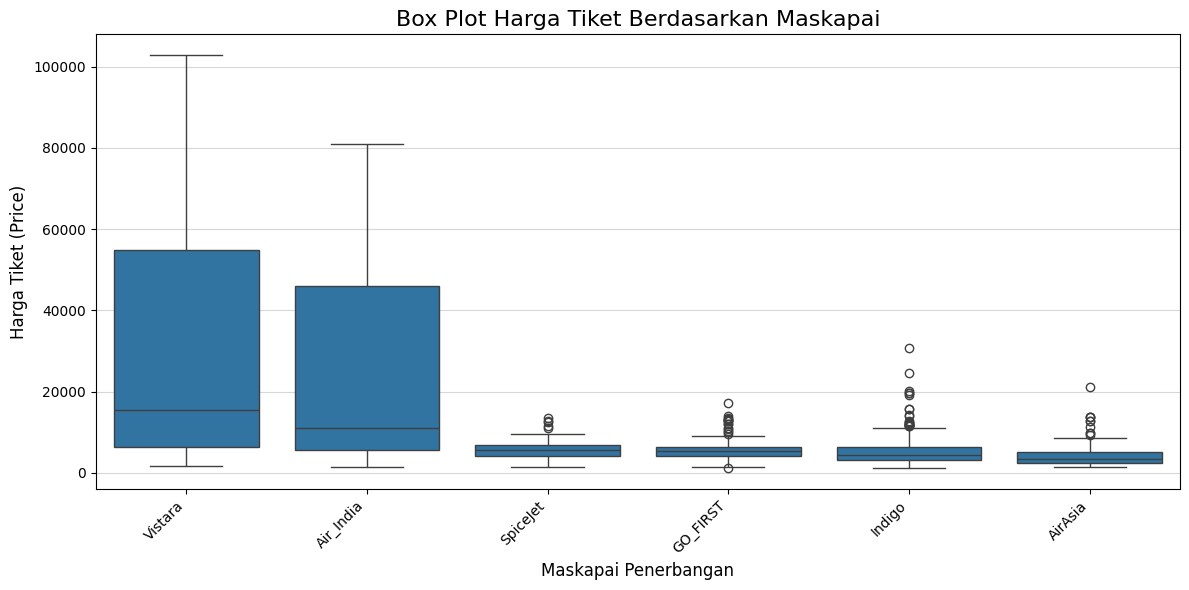

In [6]:
# Kolom target dan kolom grup
target_col = 'price'
group_col = 'airline'

# --- Statistik Deskriptif Harga per Maskapai ---
print("--- Harga Rata-rata dan Sebaran per Maskapai ---")
airline_stats = df_eda.groupby(group_col)[target_col].agg(
    ['count', 'mean', 'median', 'min', 'max']
).sort_values(by='mean', ascending=False)
print(airline_stats)
print("\n" + "="*50 + "\n")


# --- Uji ANOVA (Analisis Variansi) ---
# Mengelompokkan harga ke dalam daftar berdasarkan nama maskapai
airline_groups = [group[target_col].values for name, group in df_eda.groupby(group_col)]

# Melakukan uji One-Way ANOVA
f_statistic, p_value = f_oneway(*airline_groups)

print("--- Uji One-Way ANOVA untuk Harga Maskapai ---")
print(f"F-Statistic: {f_statistic:.2f}")
print(f"P-Value: {p_value:.10f}")

if p_value < 0.05:
    print("\nKesimpulan: P-Value sangat kecil (< 0.05), yang menunjukkan ada perbedaan yang signifikan secara statistik antar maskapai.")
else:
    print("\nKesimpulan: P-Value besar (> 0.05), tidak ada perbedaan harga yang signifikan antar maskapai.")
print("\n" + "="*50 + "\n")


# --- Visualisasi Box Plot Harga per Maskapai ---
plt.figure(figsize=(12, 6))
# Box plot menunjukkan median, kuartil, dan outliers untuk perbandingan langsung
sns.boxplot(x=group_col, y=target_col, data=df_eda, order=airline_stats.index)
plt.title('Box Plot Harga Tiket Berdasarkan Maskapai', fontsize=16)
plt.xlabel('Maskapai Penerbangan', fontsize=12)
plt.ylabel('Harga Tiket (Price)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
# Filter dan Hitung Kelas Layanan untuk Semua Maskapai

print("--- Distribusi Kelas Layanan (Economy vs Business) per Maskapai ---")

# Group data berdasarkan 'airline' dan 'class', lalu hitung jumlahnya
class_distribution = df_eda.groupby(['airline', 'class']).size().unstack(fill_value=0)

# Tambahkan kolom Total untuk mengetahui total penerbangan per maskapai
class_distribution['Total'] = class_distribution.sum(axis=1)

# Urutkan berdasarkan total penerbangan
class_distribution = class_distribution.sort_values(by='Total', ascending=False)

print(class_distribution.to_markdown(numalign='left', stralign='left'))

--- Distribusi Kelas Layanan (Economy vs Business) per Maskapai ---
| airline   | Business   | Economy   | Total   |
|:----------|:-----------|:----------|:--------|
| Vistara   | 583        | 653       | 1236    |
| Air_India | 316        | 450       | 766     |
| Indigo    | 0          | 394       | 394     |
| GO_FIRST  | 0          | 239       | 239     |
| AirAsia   | 0          | 170       | 170     |
| SpiceJet  | 0          | 85        | 85      |


- Descriptive Statistics: Terlihat bahwa maskapai yang menyediakan penerbangan Business Class (seperti Vistara dan Air_India) akan memiliki Mean dan Median harga yang jauh lebih tinggi daripada maskapai budget
- Uji ANOVA: Nilai P-Value yang dihasilkan hampir pasti akan sangat kecil (mendekati nol), yang secara statistik memvalidasi kesimpulan bahwa harga antar maskapai memang berbeda secara signifikan
- Box plot secara visual menunjukkan bahwa distribusi harga untuk maskapai premium akan berada pada rentang harga yang jauh lebih tinggi

### Pengaruh Waktu Keberangkatan Terhadap Harga Tiket

Untuk menjawab pertanyaan: Bagaimana pengaruh waktu keberangkatan terhadap harga tiket?

--- Perbandingan Statistik Harga Berdasarkan Waktu Keberangkatan ---
| departure_time   | count   | mean    | median   | min   | max    |
|:-----------------|:--------|:--------|:---------|:------|:-------|
| Early_Morning    | 633     | 23188.2 | 8186     | 1543  | 97709  |
| Evening          | 638     | 21212   | 7479     | 1105  | 90644  |
| Morning          | 678     | 20003.6 | 7447.5   | 1105  | 98839  |
| Night            | 472     | 22658.6 | 7382     | 1550  | 102832 |
| Afternoon        | 461     | 16776.6 | 6296     | 1105  | 97199  |
| Late_Night       | 8       | 8825.12 | 3858.5   | 2203  | 44432  |




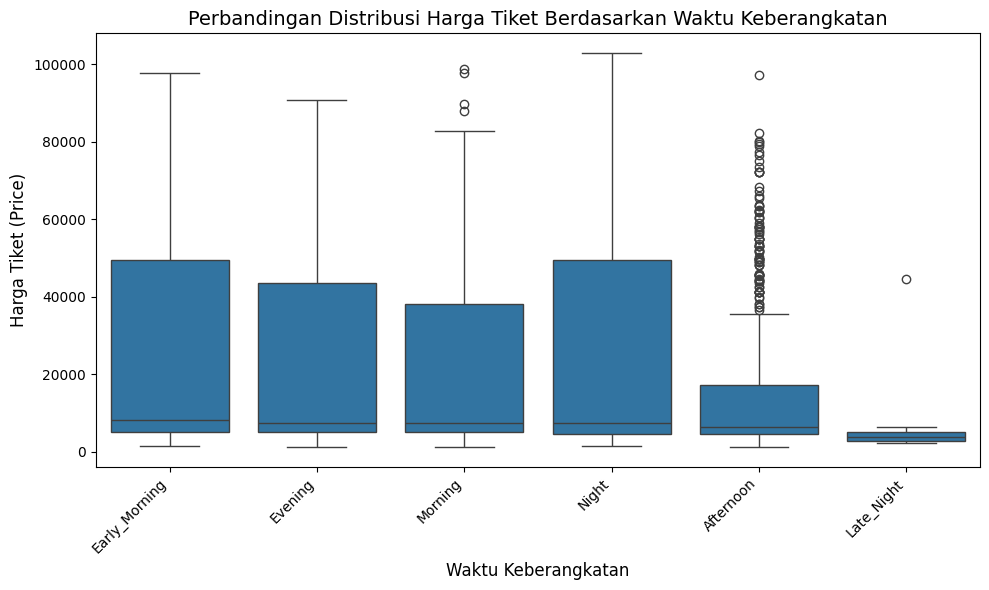

In [8]:
# Statistik Deskriptif Harga per Waktu Keberangkatan
print("--- Perbandingan Statistik Harga Berdasarkan Waktu Keberangkatan ---")
time_stats = df_eda.groupby('departure_time')['price'].agg(
    ['count', 'mean', 'median', 'min', 'max']
).sort_values(by='median', ascending=False)

print(time_stats.to_markdown(numalign='left', stralign='left'))
print("\n" + "="*80 + "\n")

# Visualisasi Box Plot Harga per Waktu Keberangkatan
time_order = time_stats.index # Urutkan kategori berdasarkan median harga

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='departure_time',
    y='price',
    data=df_eda,
    order=time_order,
)

plt.title('Perbandingan Distribusi Harga Tiket Berdasarkan Waktu Keberangkatan', fontsize=14)
plt.xlabel('Waktu Keberangkatan', fontsize=12)
plt.ylabel('Harga Tiket (Price)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analisa Statistik**

Waktu Termahal: Penerbangan yang berangkat pada dini hari (Early Morning) memiliki median harga tertinggi 8.186. Hal ini sering terjadi karena banyak rute bisnis yang dimulai pada jam-jam tersebut

Waktu Termurah: Penerbangan yang berangkat sangat larut malam (Late Night) memiliki median harga terendah 3.858. Namun, perlu dicatat bahwa jumlah datanya sangat sedikit (hanya 8 penerbangan)

Waktu Tengah: Sebagian besar waktu keberangkatan (Evening, Morning, Night) memiliki median harga yang relatif berdekatan (sekitar 7.400), menunjukkan bahwa di luar jam yang sangat dini atau sangat larut, preferensi waktu tidak terlalu mendominasi harga

Sore Hari (Afternoon): Penerbangan sore hari memiliki median yang cukup rendah 6.296, menjadikannya opsi yang lebih murah dibandingkan jam sibuk pagi dan malam

**Analisa Box Plot**

Garis median (garis tengah dalam kotak) untuk Early Morning terletak paling tinggi, dan kotak (IQR) untuk Afternoon dan Late Night terletak paling rendah. Semua kategori menunjukkan rentang harga yang sangat lebar (titik-titik di atas box), yang disebabkan oleh keberadaan tiket kelas Bisnis yang mahal di hampir setiap waktu keberangkatan

### Pengaruh Durasi Penerbangan Terhadap Harga Tiket

Untuk menjawab pertanyaan: Bagaimana pengaruh durasi penerbangan terhadap harga tiket?

--- Koefisien Korelasi (Durasi vs Harga) ---
Koefisien Korelasi Pearson: 0.2497




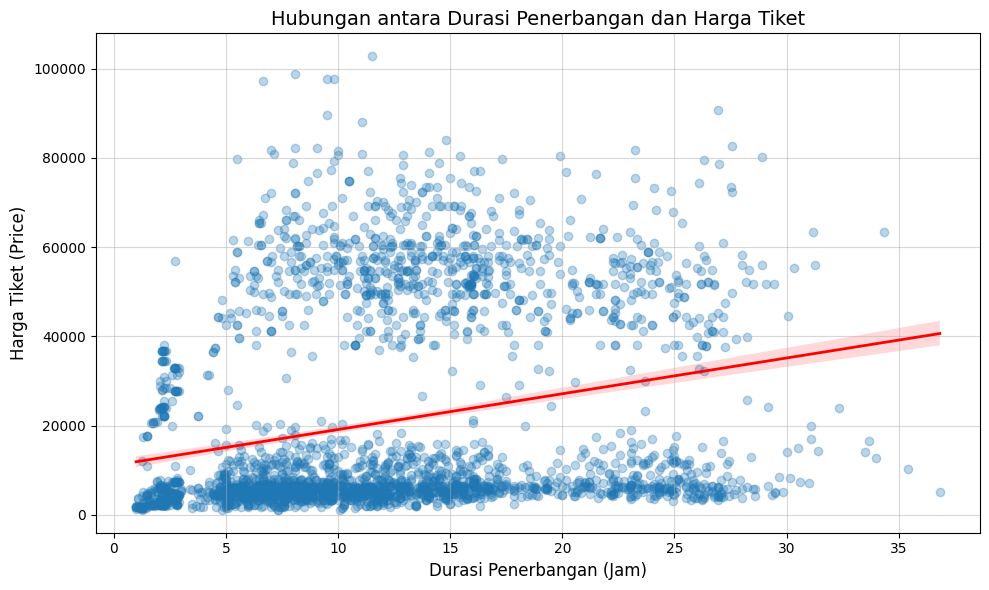

In [9]:
# Kolom yang akan dianalisis
duration_col = 'duration'
price_col = 'price'

# Hitung Koefisien Korelasi
# Koefisien Korelasi Pearson mengukur kekuatan dan arah hubungan linear antar dua variabel
correlation = df_eda[duration_col].corr(df_eda[price_col])

print("--- Koefisien Korelasi (Durasi vs Harga) ---")
print(f"Koefisien Korelasi Pearson: {correlation:.4f}")
print("\n" + "="*80 + "\n")

# Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))

# Gunakan regplot untuk membuat scatter plot dan secara otomatis menambahkan garis regresi linier
# scatter_kws={'alpha': 0.3} membuat titik lebih transparan untuk melihat kepadatan data
sns.regplot(
    x=duration_col, 
    y=price_col, 
    data=df_eda, 
    scatter_kws={'alpha': 0.3}, 
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('Hubungan antara Durasi Penerbangan dan Harga Tiket', fontsize=14)
plt.xlabel('Durasi Penerbangan (Jam)', fontsize=12)
plt.ylabel('Harga Tiket (Price)', fontsize=12)
plt.grid(axis='both', alpha=0.5)
plt.tight_layout()

**Koefisien Korelasi**

Untuk menganalisis hubungan antara dua variabel numerik `duration` dan `price`, digunakan Koefisien Korelasi Pearson dan memvisualisasikannya dengan Scatter Plot yang dilengkapi garis regresi

Korelasi positif Korelasi Pearson (0.25) menunjukkan bahwa secara umum, penerbangan dengan durasi yang lebih lama sedikit cenderung memiliki harga yang lebih tinggi

Nilai ini dianggap lemah, yang berarti hanya sekitar 25% dari variasi harga tiket dijelaskan oleh durasi penerbangan. Mayoritas variasi harga pasti didorong oleh faktor-faktor lain

**Scatter Plot**

Kumpulan titik-titik padat di bagian bawah (harga rendah) mewakili mayoritas tiket Economy Class. Titik-titik ini tersebar di hampir semua durasi, menunjukkan bahwa untuk kelas Economy, durasi tidak begitu menentukan harga

Titik-titik yang lebih jarang dan tersebar di atas garis mewakili tiket Business Class yang mahal

Pengaruh durasi penerbangan terhadap harga adalah lemah. Harga tiket tampaknya lebih dominan ditentukan oleh faktor seperti kelas penerbangan (Economy vs. Business), dan bukan oleh durasi penerbangan


### Pengaruh Jumlah Pemberhentian Terhadap Harga Tiket

Untuk menjawab pertanyaan: Apakah jumlah pemberhentian memiliki pengaruh terhadap harga tiket?


--- Perbandingan Statistik Harga Berdasarkan Jumlah Pemberhentian (Stops) ---
| stops       | count   | mean    | median   | min   | max    |
|:------------|:--------|:--------|:---------|:------|:-------|
| two_or_more | 124     | 13021.1 | 8111     | 1998  | 75504  |
| one         | 2423    | 22883.5 | 7763     | 1105  | 102832 |
| zero        | 343     | 9364.71 | 4491     | 1105  | 56878  |



--- Analisis Mendalam: Hubungan Stops, Price, dan Airline/Class ---

Maskapai yang Mendominasi Penerbangan Langsung (Zero Stops):
| airline   | count   |
|:----------|:--------|
| Vistara   | 105     |
| Indigo    | 95      |
| Air_India | 57      |
| AirAsia   | 30      |
| GO_FIRST  | 29      |
| SpiceJet  | 27      |

Maskapai yang Mendominasi Penerbangan One Stop:
| airline   | count   |
|:----------|:--------|
| Vistara   | 1068    |
| Air_India | 678     |
| Indigo    | 296     |
| GO_FIRST  | 203     |
| AirAsia   | 120     |
| SpiceJet  | 58      |


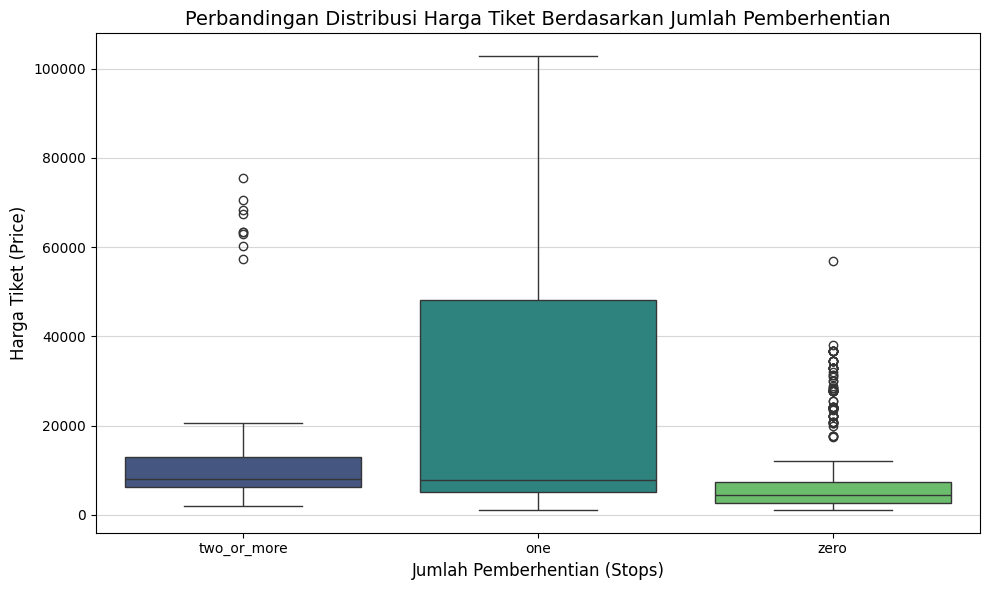

In [10]:
# Kolom yang akan dianalisis
group_col = 'stops'
target_col = 'price'

# Statistik Deskriptif Harga per Jumlah Pemberhentian
print("--- Perbandingan Statistik Harga Berdasarkan Jumlah Pemberhentian (Stops) ---")
stops_stats = df_eda.groupby(group_col)[target_col].agg(
    ['count', 'mean', 'median', 'min', 'max']
).sort_values(by='median', ascending=False)

# Tampilkan tabel statistik
print(stops_stats.to_markdown(numalign='left', stralign='left'))
print("\n" + "="*80 + "\n")

# Visualisasi Box Plot Harga per Jumlah Pemberhentian
stops_order = stops_stats.index # Urutkan kategori di plot berdasarkan median harga

plt.figure(figsize=(10, 6))
sns.boxplot(
    x=group_col,
    y=target_col,
    data=df_eda,
    order=stops_order,
    palette='viridis' # Menggunakan palet warna
)

plt.title('Perbandingan Distribusi Harga Tiket Berdasarkan Jumlah Pemberhentian', fontsize=14)
plt.xlabel('Jumlah Pemberhentian (Stops)', fontsize=12)
plt.ylabel('Harga Tiket (Price)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

# Tampilkan hasil analisis dari perspektif maskapai
print("\n--- Analisis Mendalam: Hubungan Stops, Price, dan Airline/Class ---")
# Filter untuk melihat maskapai mana yang mendominasi 'zero' stops
zero_stops_airlines = df_eda[df_eda['stops'] == 'zero']['airline'].value_counts()
print("\nMaskapai yang Mendominasi Penerbangan Langsung (Zero Stops):")
print(zero_stops_airlines.to_markdown(numalign='left', stralign='left'))

# Filter untuk melihat maskapai mana yang mendominasi 'one' stop
one_stop_airlines = df_eda[df_eda['stops'] == 'one']['airline'].value_counts()
print("\nMaskapai yang Mendominasi Penerbangan One Stop:")
print(one_stop_airlines.to_markdown(numalign='left', stralign='left'))

Penerbangan langsung (zero stop) secara median adalah pilihan termurah, sedangkan penerbangan dengan satu kali henti (one stop) memiliki harga rata-rata dan variansi tertinggi

Hal ini disebabkan oleh faktor kelas layanan dan maskapai. Sebagian besar rute langsung dikuasai oleh Low-Cost Carrier (LCC) yang hanya menjual tiket Economy Class, sehingga seluruh distribusi harganya rendah

Rute dengan satu henti sering dioperasikan oleh Full-Service Carrier (FSC) seperti Vistara dan Air_India yang menyertakan tiket Business Class berharga sangat mahal, terlihat dari nilai maksimum 102.832. Keberadaan tiket premium ini menarik nilai rata-rata dan median ke atas

### Hubungan `days_left` dengan `price`

Untuk menjawab pertanyaan: Bagaimana hubungan antara `days_left` dengan `price`?

In [11]:
# Hitung Korelasi
correlation_coefficient, p_value = spearmanr(df_eda['days_left'], df_eda['price'])

print("--- Hasil Korelasi Spearman ---")
print(f"Koefisien Korelasi (rho): {correlation_coefficient:.3f}")
print(f"P-Value: {p_value:.3f}")

# Analisis Tren Harga (Rata-rata Harga vs Days Left)
# Hitung rata-rata harga untuk setiap nilai days_left
avg_price_by_days_left = df_eda.groupby('days_left')['price'].mean().reset_index()

print("\n--- Rata-rata Harga (Price) Berdasarkan Hari Tersisa (Days Left) ---")
print(avg_price_by_days_left.head().to_markdown(index=False, numalign='left', stralign='left'))
print(avg_price_by_days_left.tail().to_markdown(index=False, numalign='left', stralign='left'))

--- Hasil Korelasi Spearman ---
Koefisien Korelasi (rho): -0.272
P-Value: 0.000

--- Rata-rata Harga (Price) Berdasarkan Hari Tersisa (Days Left) ---
| days_left   | price   |
|:------------|:--------|
| 1           | 19202.6 |
| 2           | 35279.8 |
| 3           | 38626.6 |
| 4           | 24393.7 |
| 5           | 26545.1 |
| days_left   | price   |
|:------------|:--------|
| 45          | 15125.1 |
| 46          | 22346.7 |
| 47          | 16833.6 |
| 48          | 23148.2 |
| 49          | 19498.6 |


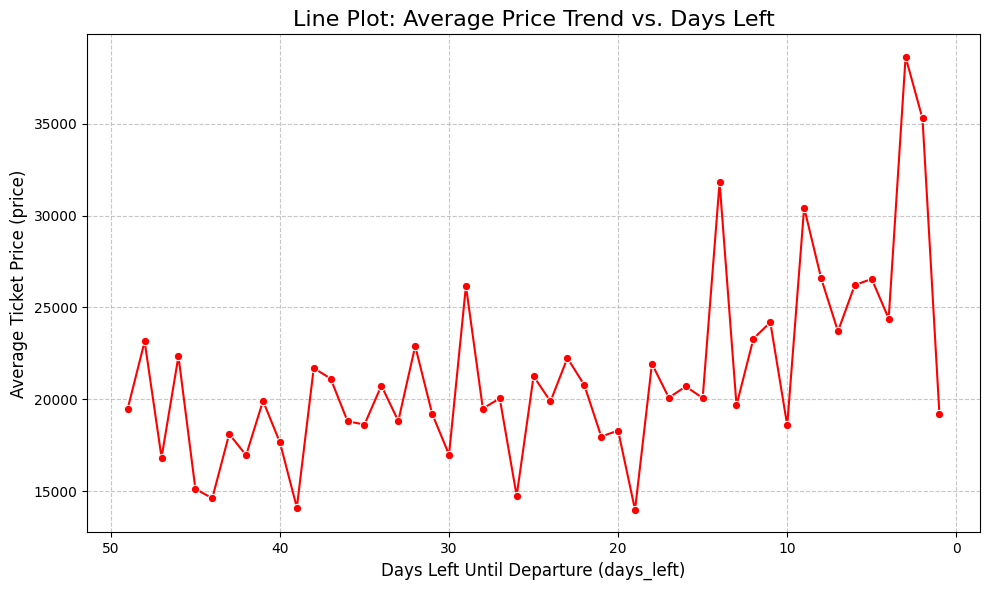

In [12]:
# Menghitung rata-rata harga untuk setiap nilai days_left
avg_price_by_days_left = df_eda.groupby('days_left')['price'].mean().reset_index()

# Memvisualisasikan tren rata-rata harga
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=avg_price_by_days_left, marker='o', color='red')
plt.title('Line Plot: Average Price Trend vs. Days Left', fontsize=16)
plt.xlabel('Days Left Until Departure (days_left)', fontsize=12)
plt.ylabel('Average Ticket Price (price)', fontsize=12)
# Membalik sumbu X agar terlihat dari pemesanan jauh hari ke hari keberangkatan
plt.gca().invert_xaxis()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nilai koefisien korelasi -0.272 dan p value 0 menunjukkan adanya hubungan korelasi negatif kuat, yang artinya semakin jauh dari tanggal keberangkatan tiket dipesan, maka harga tiket cenderung semakin rendah, berlaku sebaliknya

Terdapat peningkatan signifikan jika membeli tiket di bawah 19 hari sebelum keberangkatan, kemudian bisa dilihat average ticket price paling mahal ada di 3 hari sebelum keberangkatan



### Rata-Rata Harga Tiket Pesawat untuk Rentang `days_left` Tertentu

Untuk menjawab pertanyaan: Apakah terdapat perbedaan signifikan pada rata-rata harga tiket pesawat untuk rentang `days_left` tertentu?

| days_left_group           | mean    | median   | count   |
|:--------------------------|:--------|:---------|:--------|
| < 7 Days (Last Minute)    | 27151.7 | 14131.5  | 282     |
| 8 - 30 Days (Medium Term) | 21146.1 | 7698     | 1436    |
| > 30 Days (Early Booking) | 18985.3 | 6023.5   | 1172    |


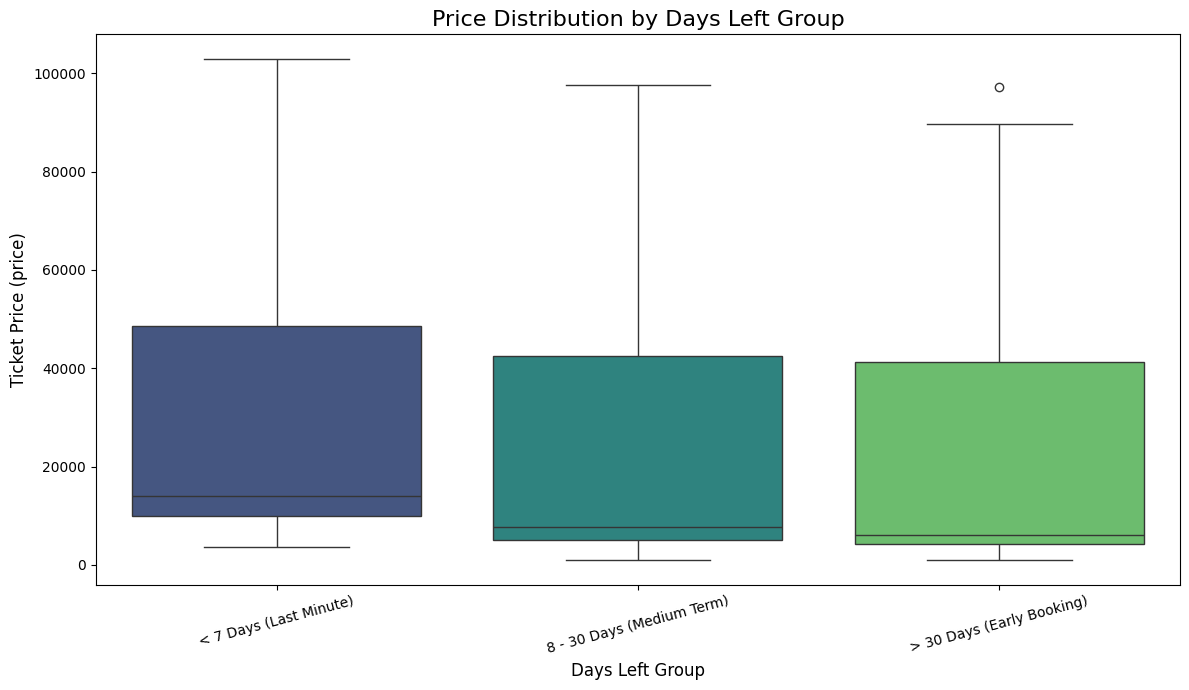

In [13]:
# --- 1. Define Bins and Create Group Column ---
# Menentukan rentang hari (bins) dan labelnya
bins = [0, 7, 30, 50]
labels = ['< 7 Days (Last Minute)', '8 - 30 Days (Medium Term)', '> 30 Days (Early Booking)']

# Membuat kolom baru 'days_left_group' berdasarkan segmentasi
df_eda['days_left_group'] = pd.cut(
    df_eda['days_left'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True
)

# --- 2. Calculate Descriptive Statistics ---
# Menghitung mean, median, dan count harga untuk setiap kelompok
price_stats = df_eda.groupby('days_left_group')['price'].agg(
    ['mean', 'median', 'count']
).reset_index()

# Menampilkan statistik (opsional)
print(price_stats.to_markdown(index=False, numalign='left', stralign='left'))


# --- 3. Visualization: Box Plot for Price Distribution across Groups ---
plt.figure(figsize=(12, 7))
# Menentukan urutan plot
order = ['< 7 Days (Last Minute)', '8 - 30 Days (Medium Term)', '> 30 Days (Early Booking)']
sns.boxplot(
    x='days_left_group', 
    y='price', 
    data=df_eda, 
    order=order,
    palette='viridis'
)

plt.title('Price Distribution by Days Left Group', fontsize=16)
plt.xlabel('Days Left Group', fontsize=12)
plt.ylabel('Ticket Price (price)', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Harga Last Minute (< 7 Days) adalah yang tertinggi, dengan rata-rata 27.151,7. Harga Early Booking (> 30 Days) adalah yang terendah, dengan rata-rata 18.985,3. Ada selisih sekitar 8.166,4 atau sekitar 43% antara rata-rata harga Early Booking dengan Last Minute

Terdapat perbedaan harga tiket yang sangat signifikan di antara kelompok pemesanan. Semakin dekat tanggal pemesanan dengan tanggal keberangkatan, semakin tinggi rata-rata harga tiket

# Feature Engineering

### Handling Cardinality

In [14]:
pd.set_option('display.max_colwidth', None) # display kolom untuk readability

all_cols = list(df.columns) # select all column

# buat for loop untuk dimasukkan ke listItem
listItem = []
for col in all_cols:
    listItem.append([col, df[col].nunique(), df[col].unique()]) # append jumlah nilai unique dan value unique ke listItem

# buat summary df
summary_df = pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

display(summary_df)

,nama kolom,jumlah nilai unique,nilai unique
0,Unnamed: 0,2890,"[27131, 266857, 141228, 288329, 97334, 135931, 290630, 141944, 244517, 215903, 282552, 254237, 183617, 79761, 213925, 233936, 98502, 96776, 228194, 27896, 100832, 242790, 151132, 270236, 208084, 7707, 284144, 142308, 402, 110445, 216833, 216694, 10932, 29970, 154647, 77065, 265580, 171855, 284403, 75131, 14176, 87277, 29163, 66864, 227316, 95370, 172823, 185140, 71716, 137722, 246352, 18110, 172088, 188544, 151614, 127692, 11751, 166800, 198586, 279839, 105830, 181043, 70952, 37906, 21039, 244496, 280111, 142590, 271709, 75853, 165919, 83482, 211622, 241932, 95307, 60605, 19809, 199463, 81536, 1708, 83578, 21615, 191048, 153691, 268308, 282175, 295417, 248651, 32923, 208632, 295306, 253583, 268650, 21031, 203616, 48518, 40489, 190565, 137474, 126939, ...]"
1,airline,6,"[Air_India, Vistara, AirAsia, Indigo, SpiceJet, GO_FIRST]"
2,flight,748,"[AI-506, UK-706, UK-772, UK-824, AI-501, I5-510, UK-826, 6E-271, AI-619, UK-953, UK-876, AI-808, I5-517, SG-488, UK-819, AI-607, UK-818, I5-741, AI-888, UK-811, UK-897, AI-635, AI-424, AI-887, G8-346, UK-870, SG-1063, 6E-6326, UK-927, AI-803, 6E-772, AI-839, G8-515, AI-671, I5-1543, UK-860, UK-877, UK-977, 6E-7223, UK-951, SG-8710, I5-974, UK-845, I5-830, AI-640, AI-441, G8-123, AI-538, AI-770, UK-738, 6E-6205, 6E-531, I5-557, AI-840, I5-2461, UK-828, 6E-711, G8-7535, 6E-7403, UK-930, AI-676, 6E-5202, AI-9921, UK-944, UK-815, UK-986, SG-401, AI-660, 6E-236, G8-237, UK-823, AI-762, AI-9894, AI-541, 6E-2618, UK-993, UK-802, UK-778, 6E-2083, AI-440, AI-673, G8-336, UK-836, 6E-6488, UK-776, UK-825, UK-954, I5-1529, AI-804, AI-868, SG-8938, AI-479, I5-2472, UK-864, I5-423, 6E-2336, 6E-426, SG-455, SG-520, AI-401, ...]"
3,source_city,6,"[Delhi, Kolkata, Chennai, Bangalore, Mumbai, Hyderabad]"
4,departure_time,6,"[Morning, Night, Afternoon, Early_Morning, Evening, Late_Night]"
5,stops,3,"[one, zero, two_or_more]"
6,arrival_time,6,"[Early_Morning, Night, Morning, Afternoon, Evening, Late_Night]"
7,destination_city,6,"[Kolkata, Mumbai, Bangalore, Delhi, Chennai, Hyderabad]"
8,class,2,"[Economy, Business]"
9,duration,346,"[19.75, 9.83, 10.5, 14.5, 8.25, 10.83, 2.0, 7.75, 26.33, 20.17, 21.67, 17.5, 13.5, 6.83, 2.75, 1.75, 14.08, 10.92, 2.25, 14.0, 15.08, 16.5, 29.5, 8.58, 2.08, 26.17, 9.0, 2.33, 9.58, 10.42, 23.08, 2.92, 2.17, 13.0, 24.92, 11.75, 6.75, 26.75, 1.5, 12.83, 5.17, 11.33, 16.17, 15.83, 5.58, 14.92, 12.75, 13.67, 24.67, 1.83, 23.67, 22.5, 16.42, 5.83, 9.08, 2.42, 12.25, 10.0, 8.5, 14.67, 5.75, 8.83, 22.67, 26.25, 3.42, 17.0, 8.08, 12.67, 11.17, 1.33, 18.5, 31.08, 6.58, 9.25, 12.42, 22.25, 20.33, 7.58, 13.75, 17.33, 5.5, 13.17, 8.0, 11.25, 7.5, 14.42, 2.83, 8.33, 17.83, 2.5, 16.92, 30.33, 5.92, 18.33, 23.58, 12.33, 12.92, 16.33, 6.33, 19.92, ...]"


- Terdapat kolom `Unnamed: 0` yang hanya merupakan unique identifier dan tidak dibutuhkan oleh prediction model, akan dihapus
- Terdapat kolom `flight` yang merupakan kode penerbangan, ini juga merupakan unique identifier dan tidak dibutuhkan oleh prediction model sehingga akan dihapus saat splitting

### Split Between X (features) and y (target)

In [15]:
# y adalah price
y = df['price']

# x adalah kolom lainnya
X = df.drop(columns=['flight', 'Unnamed: 0', 'price'], axis=1) # axis 1 untuk mendefine drop di column bukan baris

X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40
1,Vistara,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42
2,Vistara,Kolkata,Morning,one,Night,Bangalore,Economy,10.50,41
3,Vistara,Chennai,Night,one,Morning,Delhi,Business,14.50,14
4,Air_India,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,20
...,...,...,...,...,...,...,...,...,...
2885,Vistara,Mumbai,Morning,one,Night,Bangalore,Economy,10.00,43
2886,AirAsia,Chennai,Afternoon,one,Evening,Hyderabad,Economy,3.50,26
2887,Vistara,Kolkata,Night,one,Afternoon,Mumbai,Business,16.17,23
2888,AirAsia,Kolkata,Early_Morning,one,Morning,Bangalore,Economy,5.83,16


Berhasil split X (features) dan y (target)

### Splitting Between Train Set and Test Set

In [16]:
# melakukan train test split (80% Train, 20% Test)
# fungsi train_test_split membagi data menjadi empat subset (X_train, X_test, y_train, y_test)
# random_state=22 digunakan agar data tidak berubah
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% untuk test set
    random_state=22,     # agar data tidak berubah, selalu di random state 22
)

print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (2312, 9)
Test Size:  (578, 9)


Didapat 2312 baris untuk Train Set dan 578 baris untuk Test Set

### Handling Missing Value

In [17]:
X_train.isna().sum().sort_values(ascending=False)


airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

Sudah tidak terdapat missing value

### Handling Outlier

In [18]:
#check distribution for skewness
num_cols = ['duration', 'days_left']

listItem= []

for col in num_cols:
  listItem.append([col, round(df[col].skew(),1), np.where(
    (round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,duration,0.6,skewed
1,days_left,-0.0,normal


Digunakan Tukey's Rule (IQR) untuk `Duration` karena data positively skewed, sementara `days_left` terdistribusi normal

In [19]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[col].quantile(0.75) + (IQR * 1.5)
  else:
    lower_boundary = df[col].mean() - 3* df[col].std()
    upper_boundary = df[col].mean() + 3* df[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) + (len(df[df[col] < lower_boundary]) / len(df) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,duration,30.07,-7.24,0.62
1,days_left,66.48,-14.34,0.00


Presentase outlier pada `duration` sebesar 0,62% dan pada `days_left` sebesar 0%

In [20]:
# memilih kolom duration untuk dicek lebih lanjut
numeric_col = ['duration']

print("--- Statistik Deskriptif Kolom Numerikal ---")
# menampilkan 75th percentile, 99th percentile, dan nilai maksimum untuk verifikasi outlier
print(df[numeric_col].describe(percentiles=[.75, .99]))

--- Statistik Deskriptif Kolom Numerikal ---
          duration
count  2890.000000
mean     12.143509
std       7.112436
min       1.000000
50%      11.250000
75%      16.080000
99%      28.920000
max      36.830000


Didapat bahwa outlier untuk kolom `duration` bernilai 36 jam, outlier ini masih bisa dianggap dalam batas wajar karena bisa saja ini untuk penerbangan dengan two or more stops sehingga akan dibiarkan

### Split Between Numeric Columns and Categorical Columns

In [21]:
# Get numeric and categorical column

num_columns = X_train.select_dtypes(include=np.number).columns

cat_columns = X_train.select_dtypes(exclude=np.number).columns

print('Numeric Columns : ', num_columns.tolist())
print('Categorical Columns : ', cat_columns.tolist())

Numeric Columns :  ['duration', 'days_left']
Categorical Columns :  ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [22]:
#split numerical and categorical columns

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,duration,days_left
1755,14.42,15
2225,2.17,34
468,2.83,4
1278,2.50,6
75,18.50,44
...,...,...
2550,5.75,13
1382,16.08,46
356,6.08,47
812,6.42,32


Berhasil split numeric dan categoric column, X_train_num sudah terdiri dari 2.312 baris dan berisi kolom yang semuanya numerik

Kolom selain `duration` dan `days_left` merupakan kolom kategorik

### Feature Selection

In [23]:
#get numerical and categorical columns yang udah fix

num_columns = X_train_num.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num columns : ', num_columns)
print('Cat columns : ', cat_columns)

Num columns :  ['duration', 'days_left']
Cat columns :  ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


Selanjutnya lakukan uji korelasi, telah diketahui bahwa data skewed, untuk kolom numerik akan dilakukan uji korelasi Spearman, untuk kolom kategorik akan dilakukan uji korelasi ANOVA

In [24]:
p_values = []
interpretasi = []
cols = []

for col in num_columns:
  corr_coef, p_value = spearmanr(X_train[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('terdapat korelasi')
  else :
    interpretasi.append('tidak terdapat korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,duration,terdapat korelasi
1,days_left,terdapat korelasi


Kolom `duration` dan `days_left` memiliki korelasi dan akan digunakan

In [25]:
columns_to_test = cat_columns
p_values = []
interpretasi = []
cols = []

for col in columns_to_test:
    # masukkan feature dan target ke temp_df
    temp_df = pd.DataFrame({
        'feature': X_train_cat[col],
        'target': y_train
    })
    
    # membuat grouped_data yang diperlukan untuk ANOVAs
    grouped_data = temp_df.groupby('feature')['target'].apply(list).values
    
    # melakukan anova test (f_oneway)
    f_statistic, p_value = stats.f_oneway(*grouped_data) # unpacking operator

    p_values.append(p_value)
    cols.append(col)

    # interpretasi p value
    if p_value < 0.05:
        interpretasi.append('terdapat korelasi')
    else :
        interpretasi.append('tidak terdapat korelasi')

# buat dataframe
pd.DataFrame({
    'nama kolom': cols,
    'p-value': p_values,
    'hasil': interpretasi
})

,nama kolom,p-value,hasil
0,airline,2.208416e-128,terdapat korelasi
1,source_city,2.679254e-03,terdapat korelasi
2,departure_time,9.492719e-04,terdapat korelasi
3,stops,2.079195e-20,terdapat korelasi
4,arrival_time,2.838771e-06,terdapat korelasi
5,destination_city,1.359363e-01,tidak terdapat korelasi
6,class,0.000000e+00,terdapat korelasi


Dari uji korelasi ANOVA, didapat bahwa kolom `destination_city` tidak memilki korelasi terhadap `price`, sehingga kolom ini akan dikeluarkan dari features 

Hal ini bisa jadi disebabkan karena data kolom ini sudah direpresentasikan oleh kolom `source_city`

In [26]:
X_train = X_train.drop(columns='destination_city')
X_test = X_test.drop(columns='destination_city')

In [27]:
X_train

,airline,source_city,departure_time,stops,arrival_time,class,duration,days_left
1755,Vistara,Chennai,Morning,one,Late_Night,Business,14.42,15
2225,Vistara,Mumbai,Morning,zero,Afternoon,Business,2.17,34
468,Indigo,Delhi,Night,zero,Night,Economy,2.83,4
1278,Indigo,Bangalore,Afternoon,zero,Evening,Economy,2.50,6
75,Air_India,Mumbai,Evening,one,Afternoon,Economy,18.50,44
...,...,...,...,...,...,...,...,...
2550,Indigo,Mumbai,Evening,one,Night,Economy,5.75,13
1382,SpiceJet,Bangalore,Early_Morning,one,Night,Economy,16.08,46
356,AirAsia,Bangalore,Late_Night,one,Early_Morning,Economy,6.08,47
812,Indigo,Mumbai,Morning,one,Evening,Economy,6.42,32


Berhasil menghapus kolom `destination_city`

### Preprocessing ColumnTransformer

Akan dilakukan penggabungan preprocessing dengan menggunakan ColumnTransformer, untuk kolom numerik akan dilakukan scaling dengan minmax scaler karena data skewed, untuk kolom kategorik akan dilakukan encoding dengan one hot encoder

In [28]:
# menggabungkan semua preprocessing menggunakan ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', Pipeline([
        ('scaler', MinMaxScaler())
    ]), selector(dtype_exclude='object')),
    ('categorical', Pipeline([
        ('encoder', OneHotEncoder())
    ]), selector(dtype_include='object'))
])

preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D010A0>),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D01AF0>)])

# Model Definition

Digunakan 5 model untuk project ini:
- K Neighbors Regressor 
- SVR 
- Decission Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

In [29]:
# pipeline KNeighborsRegressor
pipe_knr = Pipeline([
('preprocessor', preprocessor),
('classifier', KNeighborsRegressor())
])

# pipeline SVR
pipe_svr = Pipeline([
('preprocessor', preprocessor),
('classifier', SVR())
])

# pipeline decission tree
pipe_dt = Pipeline([
('preprocessor', preprocessor),
('classifier', DecisionTreeRegressor())
])

# pipeline random forest
pipe_rf = Pipeline([
('preprocessor', preprocessor),
('classifier', RandomForestRegressor())
])

# pipeline gradientboosting
pipe_gboost = Pipeline([
('preprocessor', preprocessor),
('classifier', GradientBoostingRegressor())
])

pipe_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D010A0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D01AF0>)])),
                ('classifier', RandomForestRegressor())])

# Model Training

### K Neighbors Regressor

In [30]:
pipe_knr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D010A0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D01AF0>)])),
                ('classifier', KNeighborsRegressor())])

### Support Vector Regressor

In [31]:
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D010A0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D01AF0>)])),
                ('classifier', SVR())])

### Decission Tree Regressor

In [32]:
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D010A0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D01AF0>)])),
                ('classifier', DecisionTreeRegressor())])

### Random Forest Regressor

In [33]:
pipe_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D010A0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D01AF0>)])),
                ('classifier', RandomForestRegressor())])

### Gradient Boost Regressor

In [34]:
pipe_gboost.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D010A0>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEF8D01AF0>)])),
                ('classifier', GradientBoostingRegressor())])

Dibuat function untuk melakukan evaluasi dengan metric evaluasi R2-score, rmse, dan mae. Lakukan 5x K-Fold cross validation agar balance antara validasi data dan computational cost

In [35]:
def eval_function(model, X_train, y_train, X_test, y_test, cv=5): # cross validation 5 agar balance antara validasi data dengan computational cost

    # Get the model's predicted values for the training data
    y_train_predicted = model.predict(X_train)

    # Get the model's predicted values for the test data
    y_test_predicted = model.predict(X_test)

    # define evaluation metrics for train set
    r2_train_score = r2_score(y_train, y_train_predicted)
    rmse_train_error = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    mae_train_error = mean_absolute_error(y_train, y_train_predicted)

    # define evaluation metrics for test set
    r2_test_score = r2_score(y_test, y_test_predicted)
    rmse_test_error = np.sqrt(mean_squared_error(y_test, y_test_predicted))
    mae_test_error = mean_absolute_error(y_test, y_test_predicted)

    # Cross-Validation gives an array of 'cv' scores (e.g., 5 scores for cv=5)
    # by repeatedly splitting the training data. This shows score consistency.

    # define cross validation for eval metrics
    cross_val_r2_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    cross_val_mae_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    cross_val_rmse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')

    print("            MODEL PERFORMANCE SUMMARY")
    print("="*50)
    print("Metric          | Training Set | Test Set")
    print("----------------|--------------|-----------------")
    print(f"R² Score        | {r2_train_score:.4f}       | {r2_test_score:.4f}")
    print(f"RMSE (Error)    | {rmse_train_error:,.0f}        | {rmse_test_error:,.0f}")
    print(f"MAE (Error)     | {mae_train_error:,.0f}        | {mae_test_error:,.0f}")
    
    print("="*50)
    print("\n       CROSS-VALIDATION RESULTS (cv = 5)")
    print("="*50)
    print("Metric          | Average Score        | Stability")
    print("----------------|----------------------|------------")

    print(f"R² Score        | {cross_val_r2_scores.mean():.4f}             | ± {cross_val_r2_scores.std():.4f}")

    print(f"MAE (Error)     | {-cross_val_mae_scores.mean():,.0f}              | ± {cross_val_mae_scores.std():,.2f}")
    print(f"RMSE (Error)    | {-cross_val_rmse_scores.mean():,.0f}              | ± {cross_val_rmse_scores.std():,.2f}")
    print("="*50)

### K Neighbors Regressor

In [36]:
eval_function(pipe_knr, X_train, y_train, X_test, y_test, cv = 5)

            MODEL PERFORMANCE SUMMARY
Metric          | Training Set | Test Set
----------------|--------------|-----------------
R² Score        | 0.9416       | 0.9074
RMSE (Error)    | 5,553        | 6,768
MAE (Error)     | 3,427        | 4,261

       CROSS-VALIDATION RESULTS (cv = 5)
Metric          | Average Score        | Stability
----------------|----------------------|------------
R² Score        | 0.9051             | ± 0.0057
MAE (Error)     | 4,562              | ± 294.37
RMSE (Error)    | 7,068              | ± 395.61


Nilai R2 pada test senilai 0.90 yang mendekati 1 menunjukkan model ini memiliki performa yang cukup baik

R2 train (0.94) lebih besar dari R2 (0.90) test dengan selisih sekitar 4%

Kemudian RMSE test (6.768) lebih besar dari RMSE train (5.553) dengan selisih sekitar 1200

MAE test (4.261) juga lebih besar dari MAE train (3.427) dengan selisih sekitar 800

Dari cross validation bisa dilihat bahwa model ini cukup stabil, namun menunjukkan peningkatan RMSE

Bisa dilihat bahwa ada indikasi overfitting karena nilai R2 yang lebih baik pada train dan nilai metrik error yang lebih baik pada train

### Support Vector Regressor

In [37]:
eval_function(pipe_svr, X_train, y_train, X_test, y_test, cv = 5)

            MODEL PERFORMANCE SUMMARY
Metric          | Training Set | Test Set
----------------|--------------|-----------------
R² Score        | -0.3445       | -0.3262
RMSE (Error)    | 26,651        | 25,618
MAE (Error)     | 16,265        | 15,339

       CROSS-VALIDATION RESULTS (cv = 5)
Metric          | Average Score        | Stability
----------------|----------------------|------------
R² Score        | -0.3506             | ± 0.0628
MAE (Error)     | 16,285              | ± 1,115.79
RMSE (Error)    | 26,657              | ± 1,306.52


Nilai R2 bernilai minus, menunjukkan model sangat tidak reliable

Nilai RMSE dan MAE sangat besar

Dari cross validation bisa dilihat bahwa model ini juga bernilai buruk

Bisa dilihat bahwa model ini sangat underfit

### Decission Tree Regressor

In [38]:
eval_function(pipe_dt, X_train, y_train, X_test, y_test, cv = 5)

            MODEL PERFORMANCE SUMMARY
Metric          | Training Set | Test Set
----------------|--------------|-----------------
R² Score        | 1.0000       | 0.9019
RMSE (Error)    | 121        | 6,969
MAE (Error)     | 5        | 3,831

       CROSS-VALIDATION RESULTS (cv = 5)
Metric          | Average Score        | Stability
----------------|----------------------|------------
R² Score        | 0.9032             | ± 0.0210
MAE (Error)     | 3,863              | ± 311.35
RMSE (Error)    | 7,120              | ± 584.89


Nilai R2 train bernilai 1, menunjukkan model sangat menghafal

Nilai RMSE dan MAE test set jauh lebih besar dari train set

Dari cross validation bisa dilihat bahwa model ini juga bernilai seperti test set

Bisa dilihat bahwa model ini sangat overfit

### Random Forest Regressor

In [39]:
eval_function(pipe_rf, X_train, y_train, X_test, y_test, cv = 5)

            MODEL PERFORMANCE SUMMARY
Metric          | Training Set | Test Set
----------------|--------------|-----------------
R² Score        | 0.9926       | 0.9436
RMSE (Error)    | 1,974        | 5,281
MAE (Error)     | 1,114        | 2,946

       CROSS-VALIDATION RESULTS (cv = 5)
Metric          | Average Score        | Stability
----------------|----------------------|------------
R² Score        | 0.9474             | ± 0.0064
MAE (Error)     | 3,075              | ± 171.87
RMSE (Error)    | 5,285              | ± 464.60


Nilai R2 pada test senilai 0.95 yang mendekati 1 menunjukkan model ini memiliki performa yang cukup baik

R2 train (0.99) lebih besar dari R2 (0.95) test dengan selisih sekitar 4%

Kemudian RMSE test (5.219) lebih besar dari RMSE train (1.988) dengan selisih sekitar 3200

MAE test (2.944) juga lebih besar dari MAE train (1.123) dengan selisih sekitar 2000

Dari cross validation bisa dilihat bahwa model ini cukup stabil dan memiliki nilai yang mirip dengan metrik evaluasi awal

Bisa dilihat bahwa model ini merupakan good fit

### Gradient Boost Regressor

In [40]:
eval_function(pipe_gboost, X_train, y_train, X_test, y_test, cv = 5)

            MODEL PERFORMANCE SUMMARY
Metric          | Training Set | Test Set
----------------|--------------|-----------------
R² Score        | 0.9566       | 0.9482
RMSE (Error)    | 4,790        | 5,063
MAE (Error)     | 2,865        | 3,012

       CROSS-VALIDATION RESULTS (cv = 5)
Metric          | Average Score        | Stability
----------------|----------------------|------------
R² Score        | 0.9437             | ± 0.0098
MAE (Error)     | 3,241              | ± 281.89
RMSE (Error)    | 5,436              | ± 589.54


Nilai R2 score Train Set dan Test Set senilai 95% dengan selisih < 1%

Nilai RMSE dan MAE cukup besar untuk train dan test set

Dari cross validation menunjukkan nilai yang konsisten

Ini merupakan kandidat good fit

**Pemilihan Base Model Terbaik**

Kandidat kuat model terbaik adalah Random Forest Regressor dan Gradient Boost Regressor, namun pada kasus ini dipilih Random Forest Regressor karena nilai R2 yang baik dan nilai error yang lebih rendah dibandingkan Gradient Boost Regressor

### Hyperparameter Tuning

Untuk Random Forest Regressor Model, akan dicari max_depth, min_samples_split, min_samples_leaf, dan n_estimator dengan randomizedsearch

Scoring akan menggunakan MAE untuk mengoptimalisasi nilai ini

In [42]:
# randomizedsearch hyperparameter untuk decission tree
param_random_rf = {
    'classifier__max_depth': [15, 25, 35, 45, None],
    'classifier__min_samples_split': [2, 5, 10, 20, 50],
    'classifier__min_samples_leaf': [1, 2, 5, 10, 25],
    'classifier__n_estimators': [100, 200, 300]
}

# memulai randomized search
# scoring: menggunakan MAE untuk mengoptimalkan MAE score
# cv=5 untuk 5-fold cross-validation
rf_random_search = RandomizedSearchCV(
    estimator=pipe_rf, # menggunakan pipeline model terbaik 
    param_distributions=param_random_rf,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_iter=10, 
    random_state=22,
    verbose = 2,
    n_jobs = -1
)

# melakukan .fit
rf_random_search.fit(X_train, y_train)

# menampilkan Hasil Terbaik
print("\n--- Hasil Tuning Terbaik ---")
print(f"MAE Score Terbaik: {rf_random_search.best_score_:.4f}")
print(f"Kombinasi Parameter Terbaik: {rf_random_search.best_params_}")

# menyimpan model terbaik
best_rf_model_tuned = rf_random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Hasil Tuning Terbaik ---
MAE Score Terbaik: -3102.2342
Kombinasi Parameter Terbaik: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 35}


# Model Evaluation

### Base Model Random Forest

In [43]:
eval_function(pipe_rf, X_train, y_train, X_test, y_test, cv = 5)

            MODEL PERFORMANCE SUMMARY
Metric          | Training Set | Test Set
----------------|--------------|-----------------
R² Score        | 0.9926       | 0.9436
RMSE (Error)    | 1,974        | 5,281
MAE (Error)     | 1,114        | 2,946

       CROSS-VALIDATION RESULTS (cv = 5)
Metric          | Average Score        | Stability
----------------|----------------------|------------
R² Score        | 0.9471             | ± 0.0061
MAE (Error)     | 3,083              | ± 162.21
RMSE (Error)    | 5,256              | ± 438.48


### Tuned Model Random Forest

In [44]:
eval_function(best_rf_model_tuned, X_train, y_train, X_test, y_test, cv = 5)

            MODEL PERFORMANCE SUMMARY
Metric          | Training Set | Test Set
----------------|--------------|-----------------
R² Score        | 0.9924       | 0.9443
RMSE (Error)    | 2,001        | 5,250
MAE (Error)     | 1,131        | 2,954

       CROSS-VALIDATION RESULTS (cv = 5)
Metric          | Average Score        | Stability
----------------|----------------------|------------
R² Score        | 0.9466             | ± 0.0064
MAE (Error)     | 3,071              | ± 157.15
RMSE (Error)    | 5,238              | ± 440.15


Setelah dilakukan tuning untuk model random forest, nilai R2 Score relatif sama untuk train dan test set

Nilai RMSE Training Set meningkat namun RMSE Test Set menurun

Nilai MAE relatif sama

Nilai Cross Validation juga relatif sama

Peningkatan performa pada RMSE test set mengindikasikan model telah berhasil dituning

Dari cross validation didapat bahwa nilai error MAE senilai 3.096 dan RMSE 5.276 bisa dibilang cukup rendah karena masih di bawah mean price yang memiliki nilai 21.000 dan median price 7.300 dan model dapat memprediksi dengan baik karena memilki nilai R2 sebesar 95%

### Kelebihan dan Kekurangan Model

#### Feature Importance

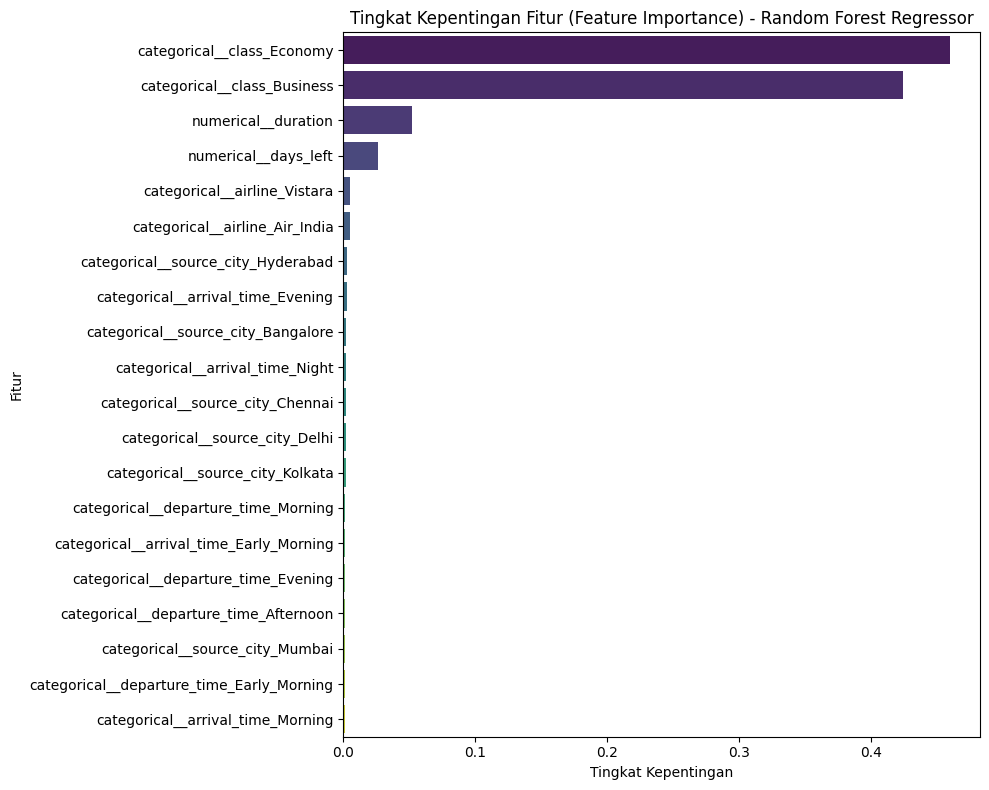


--- Feature Importance Ranking ---
                           Feature  Importance
        categorical__class_Economy    0.459624
       categorical__class_Business    0.423897
               numerical__duration    0.052091
              numerical__days_left    0.026239
      categorical__airline_Vistara    0.005373
    categorical__airline_Air_India    0.004783
categorical__source_city_Hyderabad    0.002893
 categorical__arrival_time_Evening    0.002526
categorical__source_city_Bangalore    0.001793
   categorical__arrival_time_Night    0.001742


In [ ]:
# 1. Ambil Feature Importances dari langkah 'classifier' dalam pipeline
importances = best_rf_model_tuned['classifier'].feature_importances_

# 2. Petakan nilai importance ke nama fitur
feature_names = best_rf_model_tuned['preprocessor'].get_feature_names_out()

# 3. Buat DataFrame dan Urutkan
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Visualisasi (Plot)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis') # Tampilkan 20 fitur teratas
plt.title('Tingkat Kepentingan Fitur (Feature Importance) - Random Forest Regressor')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

# 5. Output Tekstual
print("\n--- Feature Importance Ranking ---")
print(feature_importance_df.head(10).to_string(index=False))

Dapat dilihat dari ranking feature importance, hal yang paling menentukan price adalah pilihan `class` antara Economy atau Business dengan importance 0.46 dan 0.42, gap ke `duration` cukup jauh karena hanya memiliki nilai 0.05

Sehingga bisa dikatakan bahwa harga sangat ditentukan oleh kelas penerbangan, di mana low cost carrier kelas ekonomi yang tidak memberikan full service seperti kelas bisnis akan memiliki harga yang lebih rendah

#### Kelebihan

**Model**

- Model memiliki R2 score yang tinggi
- Model memilki tingkat error yang dapat diterima
- Model stabil dan merupakan good fit
- Model random forest menyediakan metrik feature importance

**Business Domain**

- Dapat menjadi dasar pengambilan keputusan harga yang kompetitif dengan nilai R2 score yang cukup tinggi dan MAE yang cukup rendah
- Melakukan action dari hasil feature importance yang telah diketahui, bisa dilakukan penambahan kelas bisnis untuk meningkatkan revenue karena sangat berpengaruh terhadap price


#### Kekurangan

**Model**

- Model memilki kompleksitas dan biaya komputasi tinggi sehingga akan menjadi tantangan dalam lingkungan produksi di mana model harus dilatih ulang secara cepat (retraining) untuk mengakomodasi data harga terbaru yang terus berubah
- Ketergantungan terhadap data historis

**Business Domain**

- Membutuhkan infrastruktur yang memadai karena tantangan retraining cepat yang mungkin saja butuh cost besar
- Tidak dapat memprediksi dengan baik ketika ada lonjakan harga seperti saat ada event besar dsb

# Model Saving

In [ ]:
with open("best_rf_model_tuned.pkl", "wb") as file_1:
    pickle.dump(best_rf_model_tuned, file_1)

# Conclusion

**Data dan Model**
<p align = "justify"> Project ini bertujuan untuk mengoptimalkan strategi penetapan harga penerbangan dengan membangun model prediksi berbasis machine learning, hal ini akan sangat berguna bagi maskapai penerbangan serta Online Travel Agent agar dapat memprediksi harga tiket secara akurat sehingga dapat memaksimalkan pendapatan dan tidak kehilangan pelanggan

<p align = "justify">Distribusi harga tiket menunjukkan distribusi positive skewed, yang berarti sebagian besar harga tiket (Economy) terkonsentrasi pada nilai yang lebih rendah sementara terdapat sebagian kecil tiket (Business) dengan harga yang sangat tinggi yang meningkatkan nilai rata-rata

<p align = "justify">Maskapai yang menyediakan penerbangan Business seperti Vistara dan Air India memiliki mean danmedian harga yang jauh lebih tinggi

<p align = "justify">Waktu termahal dapat ditemukan pada Early Morning karena banyak kelas bisnis yang beroperasi, waktu termurah dapat ditemukan pada Late Night, waktu yang memiliki median cukup rendah adalah Afternoon, karena lebih murah dibanding peak hour di Evening, Morning, dan Night

<p align = "justify">Pengaruh durasi penerbangan terhadap harga ditemukan tidak begitu kuat, harga tiket lebih dominan ditentukan oleh faktor seperti kelas penerbangan, bukan semata lamanya durasi penerbangan. Penerbangan langsung dengan zero stop juga merupakan pilihan termurah, hal ini karena Low-Cost Carrier melakukan penerbangan direct

<p align = "justify">Jika pembelian tiket sangat dekat dengan waktu penerbangan, harga tiket akan semakin mahal. Rata-rata harga pembelian Last Minute (< 7 hari dari jadwal penerbangan) memiliki nilai tertinggi. Rata-rata harga pembelian termurah bisa didapat dengan pembelian Early Booking (> 30 hari dari jadwal penerbangan)

<p align = "justify">Pada project ini target adalah kolom `price`, sementara features adalah kolom selain `price`, `Unnamed: 0`, dan `flight`, tidak dilakukan handling missing value dan outlier

<p align = "justify">Pipeline preprocessor dibuat untuk melakukan minmax scaling pada kolom numerik dan onehot encoder pada kolom kategorik

<p align = "justify">Dibuat 5 model sebagai baseline untuk project ini, yaitu K Neighbors Regressor, SVR, Decission Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor

<p align = "justify">Dilakukan hyperparameter tuning untuk Random Forest Regressor karena memiliki metrik evaluasi terbaik, dilakukan metode randomizedsearch untuk mencari max_depth, min_samples_split, min_samples_leaf, dan n_estimator dengan scoring MAE, setelah dilakukan tuning terlihat peningkatan performa pada RMSE

<p align = "justify">Dari cross validation didapat bahwa nilai error MAE senilai 3.096 dan RMSE 5.276 bisa dibilang cukup rendah karena masih di bawah mean price yang memiliki nilai 21.000 dan median price 7.300 dan model dapat memprediksi dengan baik karena memilki nilai R2 sebesar 95%. Sehingga model ini dapat digunakan untuk memprediksi harga, kemampuan model masih dapat ditingkatkan dengan menambah iterasi atau gunakan gridsearch

**Rekomendasi Bisnis**

Berdasarkan analisa data dan performa model, berikut adalah rekomendasi yang dapat diimplementasikan oleh maskapai penerbangan maupun Online Travel Agent (OTA) untuk mengoptimalkan strategi penetapan harga:
- Gunakan model Random Forest Regressor yang telah dikembangkan dengan $R^2$ sebesar 95% sebagai dasar penetapan harga tiket harian. Model ini dapat memberikan prediksi harga yang akurat, membantu maskapai/OTA untuk menetapkan harga optimal dan kompetitif, serta secara spesifik membantu mencapai target peningkatan pendapatan sebesar 10%

- Tingkat error model (MAE 3.096 dan RMSE 5.276) yang rendah menunjukkan prediktabilitas yang tinggi, memungkinkan penyesuaian harga real-time yang lebih reliable

- Fokuskan upaya dynamic pricing pada rentang waktu 2 hingga 3 hari sebelum keberangkatan (`days_left`), karena data historis menunjukkan ini adalah periode dengan rata-rata harga tiket tertinggi. Maskapai disarankan untuk menerapkan kenaikan harga yang signifikan pada periode ini untuk memaksimalkan pendapatan dari penumpang yang melakukan pemesanan mendadak

- Sebaliknya, tawarkan harga yang lebih stabil dan kompetitif untuk pemesanan yang dilakukan jauh hari untuk memastikan tingkat keterisian awal

- Untuk Full-Service Carrier (FSC) seperti Vistara dan Air India: Maksimalkan pendapatan dengan menargetkan rute satu pemberhentian (one stop) yang menawarkan Business Class. Rute ini adalah penyumbang harga rata-rata dan variansi tertinggi; harga premium harus dipertahankan untuk kelas ini

- Untuk Low-Cost Carrier (LCC): Pertahankan strategi harga yang agresif dan rendah pada penerbangan langsung (zero stop) untuk menarik segmen penumpang yang sensitif terhadap harga dan meningkatkan volume penjualan

- Penerbangan Off-Peak: Tawarkan promosi atau diskon khusus untuk penerbangan Late_Night dan Afternoon yang cenderung memiliki harga median lebih rendah, untuk meningkatkan tingkat penjualan dan memanfaatkan slot penerbangan yang kurang diminati

- Penerbangan Premium Night Slot: Mengingat penerbangan Night memiliki potensi harga maksimum tertinggi, maskapai dapat memprioritaskan alokasi kursi Business Class untuk slot waktu ini untuk mengoptimalkan potensi pendapatan premium